In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import pickle

from env import *
from policy.hybrid import HybridQ

In [2]:
def train(para, **kw):
    result = {}
    for l in tqdm(para['range']):
        l = round(l,2)
        nw.clean()
        result[l] = nw.train(para['times'],lambd = l, lr=para['lr'], freq = para['freq'], **kw)
    return result

In [4]:
nw = Network('net/lata.net', is_drop=False)

In [5]:
nw.agent = HybridQ(nw)

In [6]:
hybr = {}
dr = {}
# nw.agent.load('6x6/hybrid/2.5')

In [39]:
for i in range(1):    
    for k,v in train({
        'range': np.arange(0.1, 0.51, 0.1),
        'times': 20000,
        'lr': {'q': 0.4, 'p': 0.1, 'e': 0},
        'freq': 1
    }, droprate = True, hop = True).items():
        hybr[k] = v['route_time']
        dr[k] = v['droprate']

100%|██████████| 5/5 [02:11<00:00, 26.31s/it]


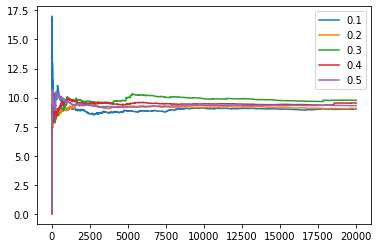

In [40]:
HYBR = pd.DataFrame(hybr)
HYBR.plot()

In [41]:
HYBR.tail(500).mean()

0.1    9.007479
0.2    9.076842
0.3    9.779720
0.4    9.538368
0.5    9.315356
dtype: float64

In [42]:
# HYBR.to_csv('hybrid.csv',index=0)
nw.agent.store('lata/hybr/0.5')
# nw.agent.store('hybrid_r/2.8')